#Clustering-Based Recommender Systems
##Part 1

In [2]:
#1.Let’s install and import the required libraries.
#Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import seaborn as sns
import os
from sklearn import preprocessing

In [4]:
#2.Let’s install and import the required libraries.
# read Record dataset
df_order = pd.read_excel('/content/Rec_sys_data (1).xlsx')
#read Customer Dataset
df_customer = pd.read_excel('/content/Rec_sys_data (1).xlsx',
 sheet_name = 'customer')
# read product dataset
df_product = pd.read_excel('/content/Rec_sys_data (1).xlsx',
 sheet_name = 'product')


In [5]:
#3.Print the top five rows of the DataFrame.
#Viewing Top 5 Rows
print(df_order.head())
print(df_customer.head())
print(df_product.head())


   InvoiceNo StockCode  Quantity         InvoiceDate        DeliveryDate  \
0     536365    84029E         6 2010-12-01 08:26:00 2010-12-02 08:26:00   
1     536365     71053         6 2010-12-01 08:26:00 2010-12-02 08:26:00   
2     536365     21730         6 2010-12-01 08:26:00 2010-12-03 08:26:00   
3     536365    84406B         8 2010-12-01 08:26:00 2010-12-03 08:26:00   
4     536365     22752         2 2010-12-01 08:26:00 2010-12-04 08:26:00   

   Discount%        ShipMode  ShippingCost  CustomerID  
0       0.20      ExpressAir         30.12       17850  
1       0.21      ExpressAir         30.12       17850  
2       0.56     Regular Air         15.22       17850  
3       0.30     Regular Air         15.22       17850  
4       0.57  Delivery Truck          5.81       17850  
   CustomerID  Gender  Age  Income  Zipcode Customer Segment
0       13089    male   53    High     8625   Small Business
1       15810  female   22     Low    87797   Small Business
2       15556  fem

In [6]:
#4.Preprocessing the Data
# function to check missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table


In [7]:
#5.let us call the function now
missing_zero_values_table(df_customer)

Your selected dataframe has 6 columns and 4372 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


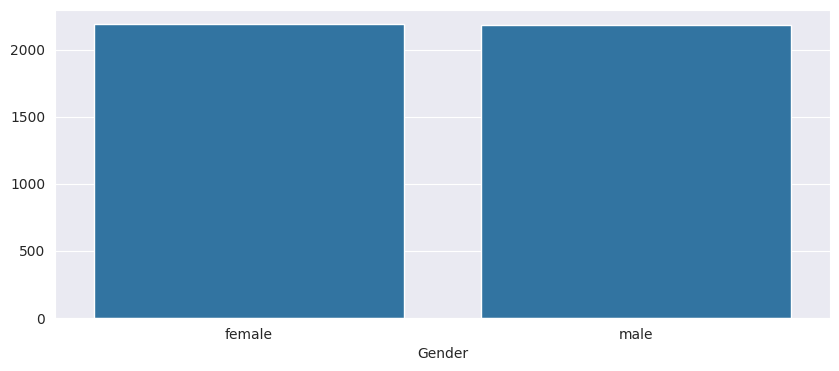

In [8]:
#6.Exploratory Data Analysis
# Count of gender Category
genders = df_customer.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()


<ipython-input-9-57fece19190f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


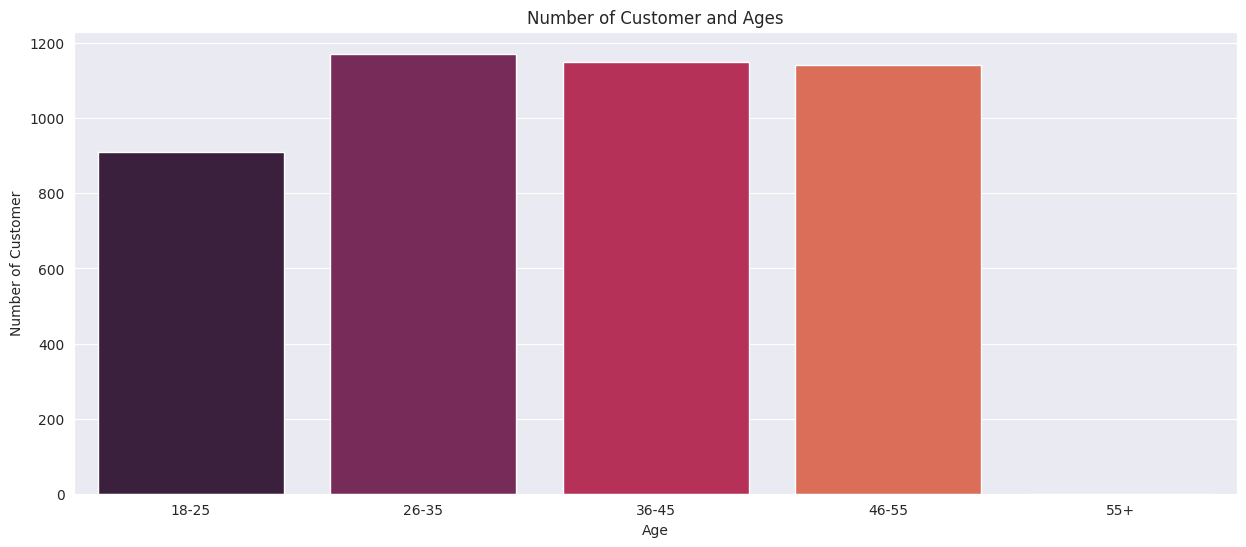

In [9]:
# age buckets against number of customers
age18_25 = df_customer.Age[(df_customer.Age <= 25) & (df_customer.Age >= 18)]
age26_35 = df_customer.Age[(df_customer.Age <= 35) & (df_customer.Age >= 26)]
age36_45 = df_customer.Age[(df_customer.Age <= 45) & (df_customer.Age >= 36)]
age46_55 = df_customer.Age[(df_customer.Age <= 55) & (df_customer.Age >= 46)]
age55above = df_customer.Age[df_customer.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


In [10]:
#7.Let’s encode all categorical variables.
# label_encoder object knows how to understand word labels.
gender_encoder = preprocessing.LabelEncoder()
segment_encoder = preprocessing.LabelEncoder()
income_encoder =  preprocessing.LabelEncoder()
# Encode labels in column
df_customer['age'] = df_customer.Age
df_customer['gender']= gender_encoder.fit_transform(df_customer['Gender'])
df_customer['customer_segment']= segment_encoder.fit_transform(df_customer['Customer Segment'])
df_customer['income_segment']= income_encoder.fit_transform(df_customer['Income'])
print("gender_encoder",df_customer['gender'].unique())
print("segment_encoder",df_customer['customer_segment'].unique())
print("income_encoder",df_customer['income_segment'].unique())


gender_encoder [1 0]
segment_encoder [2 0 1]
income_encoder [0 1 2]


In [11]:
# Select all rows of df_customer  and only the last 6 columns
# write your code here
# Select all rows and the last 6 columns
df_customer_last_6_cols = df_customer.iloc[:, -6:]

# Display the selected columns
print(df_customer_last_6_cols)

      Zipcode Customer Segment  age  gender  customer_segment  income_segment
0        8625   Small Business   53       1                 2               0
1       87797   Small Business   22       0                 2               1
2       29257        Corporate   29       0                 0               0
3       97818     Middle class   29       1                 1               2
4       79200   Small Business   36       1                 2               1
...       ...              ...  ...     ...               ...             ...
4367    57980        Corporate   22       0                 0               0
4368    38622     Middle class   23       1                 1               0
4369    57985     Middle class   40       1                 1               2
4370    91274     Middle class   37       1                 1               2
4371    79580     Middle class   19       0                 1               2

[4372 rows x 6 columns]


## Part 2

<ipython-input-21-686a41d15780>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Income'] = features['Income'].map(income_mapping)


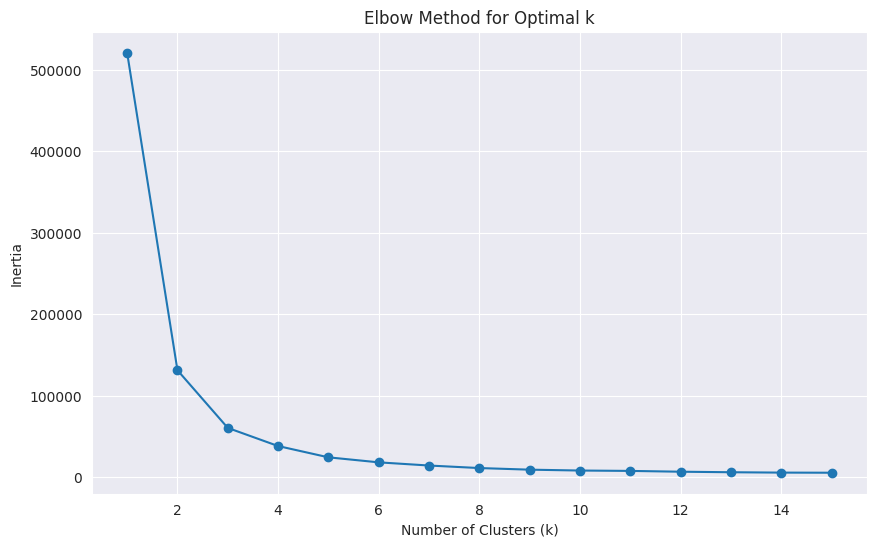

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numerical features for clustering
features = df_customer[['Age', 'Income']]

# Convert 'Income' column to numerical by replacing string values
# Assuming 'High', 'Medium', 'Low' are the only string values in 'Income'
income_mapping = {'High': 3, 'Medium': 2, 'Low': 1}  # Example mapping, adjust as needed
features['Income'] = features['Income'].map(income_mapping)

# Handle any remaining non-numeric values (e.g., NaNs)
features = features.dropna() # Drop rows with missing values
# or
# features = features.fillna(0) # Fill missing values with 0


inertia = []
K = range(1, 16)

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [22]:
# Perform K-Means clustering with 15 clusters (or the optimal k from the elbow method)
optimal_k = 15
km_cust = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = km_cust.fit_predict(features)

# Add cluster assignments to the customer dataset
df_customer['cluster'] = clusters
df_customer = df_customer[['CustomerID', 'Gender', 'Age', 'Income', 'Zipcode', 'Customer Segment', 'cluster']]
print(df_customer.head())


   CustomerID  Gender  Age  Income  Zipcode Customer Segment  cluster
0       13089    male   53    High     8625   Small Business       12
1       15810  female   22     Low    87797   Small Business        9
2       15556  female   29    High    29257        Corporate        7
3       13137    male   29  Medium    97818     Middle class        7
4       16241    male   36     Low    79200   Small Business        2


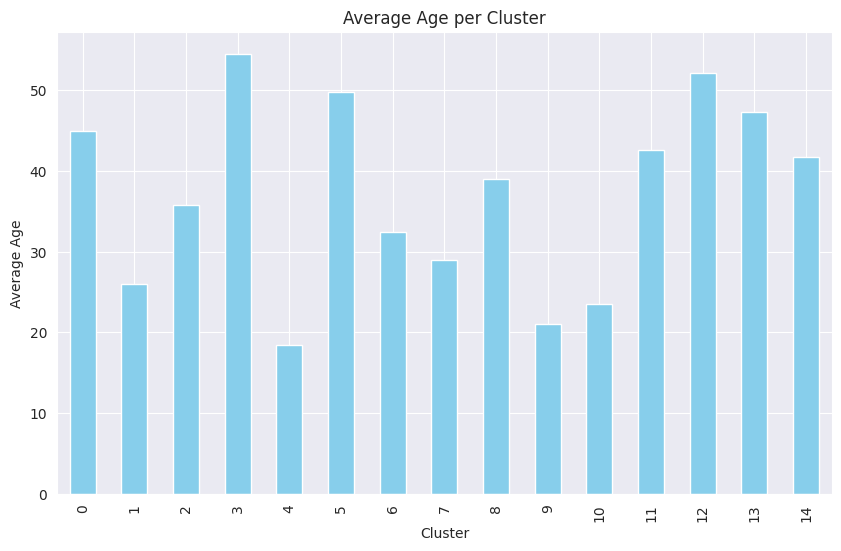

In [23]:
# Average age per cluster
avg_age = df_customer.groupby('cluster')['Age'].mean()

plt.figure(figsize=(10, 6))
avg_age.plot(kind='bar', color='skyblue')
plt.title('Average Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()


In [24]:
# Join customer data with order data
order_cluster_mapping = pd.merge(df_order, df_customer, on='CustomerID', how='inner')

# Select required columns
order_cluster_mapping = order_cluster_mapping[['StockCode', 'CustomerID', 'cluster']]
print(order_cluster_mapping.head())


  StockCode  CustomerID  cluster
0    84029E       17850       13
1     71053       17850       13
2     21730       17850       13
3    84406B       17850       13
4     22752       17850       13


In [25]:
# Create score_df by grouping on 'cluster' and 'StockCode'
score_df = order_cluster_mapping.groupby(['cluster', 'StockCode']).count().reset_index()
score_df = score_df.rename(columns={'CustomerID': 'Score'})
print(score_df.head())


   cluster StockCode  Score
0        0     10002      4
1        0     10080      2
2        0     10120      1
3        0     10125      1
4        0     10133     10


In [30]:
# Select the required columns from the dataset
df_customer = df_customer[['CustomerID', 'Gender', 'Age', 'Income', 'Zipcode', 'Customer Segment', 'cluster']]
print(df_customer.head())


   CustomerID  Gender  Age  Income  Zipcode Customer Segment  cluster
0       13089    male   53    High     8625   Small Business       12
1       15810  female   22     Low    87797   Small Business        9
2       15556  female   29    High    29257        Corporate        7
3       13137    male   29  Medium    97818     Middle class        7
4       16241    male   36     Low    79200   Small Business        2


In [31]:
# Group by 'cluster' and 'StockCode', then count the number of purchases
score_df = order_cluster_mapping.groupby(['cluster', 'StockCode']).count().reset_index()

# Rename the column to 'Score' for clarity
score_df = score_df.rename(columns={'CustomerID': 'Score'})
print(score_df.head())


   cluster StockCode  Score
0        0     10002      4
1        0     10080      2
2        0     10120      1
3        0     10125      1
4        0     10133     10


In [32]:
# Preprocessing descriptions
# Check for missing or inconsistent values in df_product
missing_zero_values_table(df_product)

# Clean the 'Description' column
df_product['Description'] = df_product['Description'].replace({"'ll": " "}, regex=True)
df_product['Description'] = df_product['Description'].replace({"-": " "}, regex=True)
df_product['Description'] = df_product['Description'].replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

# Verify the cleaning process
print(df_product['Description'].head())


Your selected dataframe has 8 columns and 29912 Rows.
There are 5 columns that have missing values.
0    New unique design great giftHigh quality plast...
1    Rounded rectangular cat eye reading glasses Th...
2    Each Nintendo 2DS kit is printed with super hi...
3    The sheerest compression stocking in its class...
4    Features  Made in the USA  Sawtooth hanger on ...
Name: Description, dtype: object


In [33]:
# Convert descriptions to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
X = vectorizer.fit_transform(df_product['Description'])


In [35]:
# Perform K-Means clustering on products
km_des = KMeans(n_clusters=15, init='k-means++', random_state=42)
clusters = km_des.fit_predict(X)

# Add cluster assignments to the product dataset
df_product['cluster'] = clusters
print(df_product.head())


  StockCode                                       Product Name  \
0     22629  Ganma Superheroes Ordinary Life Case For Samsu...   
1     21238  Eye Buy Express Prescription Glasses Mens Wome...   
2     22181  MightySkins Skin Decal Wrap Compatible with Ni...   
3     84879  Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...   
4     84836      Stupell Industries Chevron Initial Wall D cor   

                                         Description  \
0  New unique design great giftHigh quality plast...   
1  Rounded rectangular cat eye reading glasses Th...   
2  Each Nintendo 2DS kit is printed with super hi...   
3  The sheerest compression stocking in its class...   
4  Features  Made in the USA  Sawtooth hanger on ...   

                                            Category               Brand  \
0  Cell Phones|Cellphone Accessories|Cases & Prot...               Ganma   
1          Health|Home Health Care|Daily Living Aids     Eye Buy Express   
2  Video Games|Video Game Accessories|

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Function to calculate cosine similarity
def cosine_similarity_T(df, query):
    """
    Calculate the cosine similarity between product descriptions and a given query.
    """
    # Change stop_words to a list instead of frozenset
    vec = TfidfVectorizer(analyzer='word', stop_words=list(ENGLISH_STOP_WORDS))
    vec_train = vec.fit_transform(df['Description'])
    vec_query = vec.transform([query])
    within_cosine_similarity = []

    for i in range(len(vec_train.todense())):
        within_cosine_similarity.append(
            cosine_similarity(vec_train[i, :].toarray(), vec_query.toarray())[0][0]
        )

    df['Similarity'] = within_cosine_similarity
    return df

In [44]:
# Function to recommend products based on a given customer ID
def recommend_product(customer_id):
    """
    Recommend products to a customer based on their cluster and product similarity.
    """
    # Identify the cluster the customer belongs to
    customer_cluster = order_cluster_mapping[
        order_cluster_mapping.CustomerID == customer_id
    ]['cluster'].iloc[0]

    # Get products in the same cluster
    cluster_score_df = score_df[score_df.cluster == customer_cluster]

    # Filter out products already bought by the customer
    non_bought = cluster_score_df[
        ~cluster_score_df.StockCode.isin(
            order_cluster_mapping[order_cluster_mapping.CustomerID == customer_id]['StockCode']
        )
    ]

    # Top 5 non-bought products
    top_5_non_bought = non_bought.nlargest(5, 'Score')
    print("\n--- Top 5 Non-Bought Products ---\n")
    print(top_5_non_bought)

    # Display recommended product names
    recommended_products = df_product[df_product.StockCode.isin(top_5_non_bought.StockCode)]
    print("\n--- Recommended Product Names ---\n")
    print(recommended_products[['StockCode', 'Product Name']])

    # Query for item similarity based on the most popular non-bought product
    query = recommended_products.iloc[0]['Description']
    similar_products = cosine_similarity_T(df_product, query)

    # Show the top 3 most similar products
    print("\n--- Similar Products Based on Item Similarity ---\n")
    print(similar_products.nlargest(3, 'Similarity')[['StockCode', 'Product Name', 'Similarity']])


In [45]:
# Example usage:
recommend_product(customer_id=13137)


--- Top 5 Non-Bought Products ---

       cluster StockCode  Score
20170        7    85123A    148
18653        7     22423    101
19611        7     47566     94
18686        7     22457     77
18923        7     22720     73

--- Recommended Product Names ---

     StockCode                                       Product Name
135     85123A  Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...
225      22423  Handcrafted Ercolano Music Box Featuring "Lunc...
526      22720  MightySkins Skin Decal Wrap Compatible with DJ...
597      22457  3 1/2"W x 20"D x 20"H Funston Craftsman Smooth...
1048     47566  Port Authority K110 Dry Zone UV Micro-Mesh Pol...

--- Similar Products Based on Item Similarity ---

   StockCode                                       Product Name  Similarity
3      84879  Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...         1.0
25     22301  Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...         1.0
47     22291  Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac

# The End
      .-""""-.
     / -    - \
    |  O    O  |
    |     >    |
     \  \__/  /
      `-.....-`
                /
        /|\\   /
        / | \\/
          |
        / \\
        /   \
